In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import sys
sys.path.insert(0, '../src')

## 3. Modeling - Logistic Classification

### 3.1 Load and Explore Dataset

**[3.1.1]** Import the pandas, numpy, and dump package

In [20]:
import pandas as pd
import numpy as np
from joblib import dump

**[3.1.2]** Load the dataset

In [21]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_val = pd.read_csv('../data/processed/y_val.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

In [22]:
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

### 3.2 Logistic Classification

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Fit the model before hyperparameter tuning.

In [24]:
log_reg = LogisticRegression(random_state=8, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=8)

In [25]:
from models.predict_model import Modeling

In [26]:
modeling = Modeling(log_reg, X_train, X_val, y_train, y_val, X_test)

                roc-auc score  accuracy score  precision score  recall score   
Training Set         0.999884        0.996617         0.993702      0.999569  \
Validation Set       0.999795        0.996148         0.992653      0.999696   

                f1 score  
Training Set    0.996627  
Validation Set  0.996162  


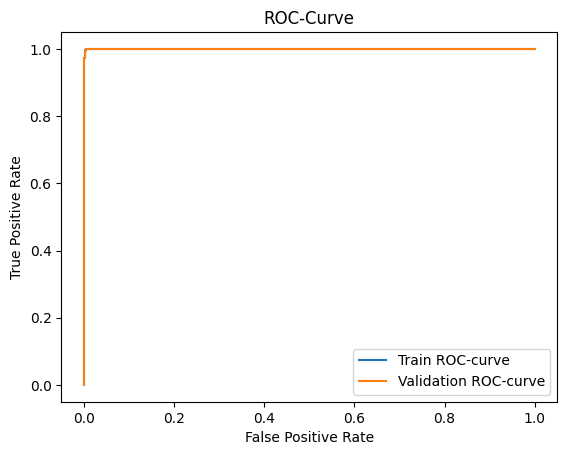

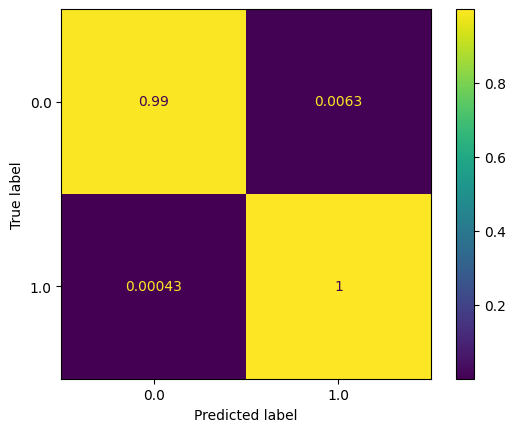

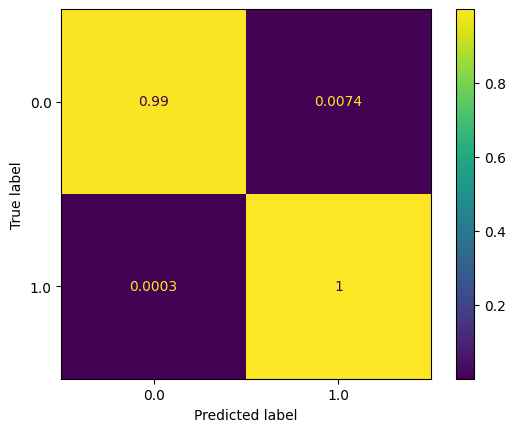

In [27]:
modeling.predict_model()

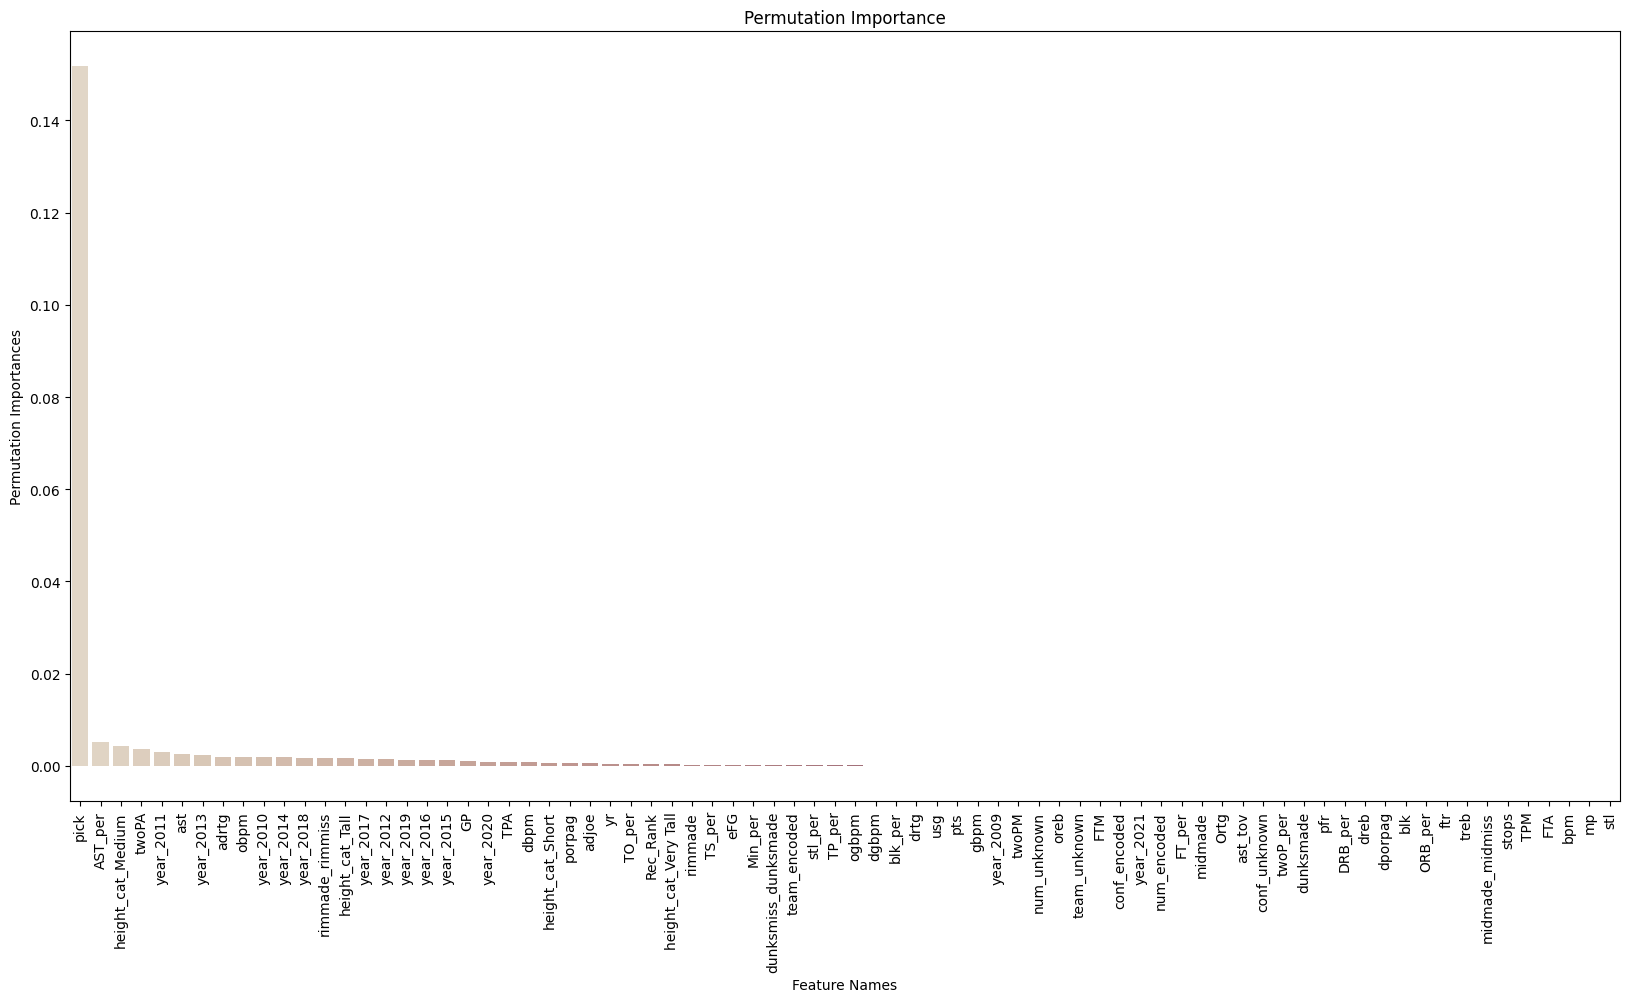

In [28]:
permutation_score = modeling.permutation_importance()

In [29]:
permutation_score

,Feature Names,Permutation Importances
34,pick,0.151720
8,AST_per,0.005097
66,height_cat_Medium,0.004284
14,twoPA,0.003667
55,year_2011,0.003053
...,...,...
16,TPM,-0.000074
11,FTA,-0.000078
39,bpm,-0.000079
43,mp,-0.000084


In [14]:
from visualization.submission_file import submission_file

In [15]:
y_test_probs = log_reg.predict_proba(X_test)[:, 1]

In [16]:
submission_1 = submission_file(y_test_probs)

In [17]:
submission_1.to_csv('../data/submission/submission_1_logit.csv', index=False)

In [8]:
from joblib import dump

dump(log_reg, '../models/logistic.joblib')

['../models/logistic.joblib']

#### Hyperparameter Tuning with C

Smaller values specify stronger regularization

default = 1

In [46]:
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_auc_score = []
val_auc_score = []
train_accuracy = []
val_accuracy = []
train_recall = []
val_recall = []
train_precision = []
val_precision = []
train_f1_score = []
val_f1_score = []

max_iter = 2000

for k in c:
    log = LogisticRegression(random_state=8, max_iter=max_iter, C=k).fit(X_train, y_train)
    
    y_train_preds = log.predict(X_train)
    y_val_preds = log.predict(X_val)
    
    y_train_probs = log.predict_proba(X_train)[:, 1]
    y_val_probs = log.predict_proba(X_val)[:, 1]

    train_accuracy.append(accuracy_score(y_train, y_train_preds))
    val_accuracy.append(accuracy_score(y_val, y_val_preds))

    train_recall.append(recall_score(y_train, y_train_preds))
    val_recall.append(recall_score(y_val, y_val_preds))

    train_precision.append(precision_score(y_train, y_train_preds))
    val_precision.append(precision_score(y_val, y_val_preds))

    train_f1_score.append(f1_score(y_train, y_train_preds))
    val_f1_score.append(f1_score(y_val, y_val_preds))
    
    train_auc_score.append(roc_auc_score(y_train, y_train_probs))
    val_auc_score.append(roc_auc_score(y_val, y_val_probs))

results_c = pd.DataFrame({'train_auc_score': train_auc_score,
                          'val_auc_score': val_auc_score,
                          'train_accuracy': train_accuracy,
                          'val_accuracy': val_accuracy,
                          'train_precision': train_precision,
                          'val_precision': val_precision,
                          'train_recall': train_recall,
                          'val_recall': val_recall,
                          'train_f1_score': train_f1_score,
                          'val_f1_score': val_f1_score}, index=c)
results_c

,train_auc_score,val_auc_score,train_accuracy,val_accuracy,train_precision,val_precision,train_recall,val_recall,train_f1_score,val_f1_score
0.001,0.997314,0.996688,0.982389,0.983175,0.969562,0.970211,0.996047,0.996959,0.982626,0.983403
0.010,0.998922,0.998502,0.993488,0.993310,0.987192,0.986797,0.999949,1.000000,0.993530,0.993355
0.100,0.999707,0.999553,0.995464,0.995388,0.991133,0.990959,0.999873,0.999899,0.995484,0.995409
1.000,0.999884,0.999795,0.996617,0.996148,0.993702,0.992653,0.999569,0.999696,0.996627,0.996162
10.000,0.999914,0.999849,0.996896,0.996402,0.994627,0.993550,0.999189,0.999290,0.996903,0.996412
100.000,0.999924,0.999887,0.996972,0.996503,0.994928,0.993950,0.999037,0.999088,0.996978,0.996512
1000.000,0.999932,0.999903,0.997149,0.996655,0.995279,0.994251,0.999037,0.999088,0.997155,0.996663


In [47]:
def plot_performance(parameter, xlabel):

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))

    ax1.plot(parameter, val_accuracy, label='Validation Accuracy')
    ax1.plot(parameter, train_accuracy, label='Training Accuracy')
    ax1.legend()
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Accuracy Score')

    ax2.plot(parameter, val_precision, label='Validation Precision')
    ax2.plot(parameter, train_precision, label='Training Precision')
    ax2.legend()
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision Score')

    ax3.plot(parameter, val_recall, label='Validation Recall')
    ax3.plot(parameter, train_recall, label='Training Recall')
    ax3.legend()
    ax3.set_xlabel(xlabel)
    ax3.set_ylabel('Recall')
    ax3.set_title('Recall Score')

    ax4.plot(parameter, val_f1_score, label='Validation F1-Score')
    ax4.plot(parameter, train_f1_score, label='Training F1-Score')
    ax4.legend()
    ax4.set_xlabel(xlabel)
    ax4.set_ylabel('F1-Score')
    ax4.set_title('F1-Score')
    
    plt.subplots_adjust(wspace=0.4)
    plt.show()

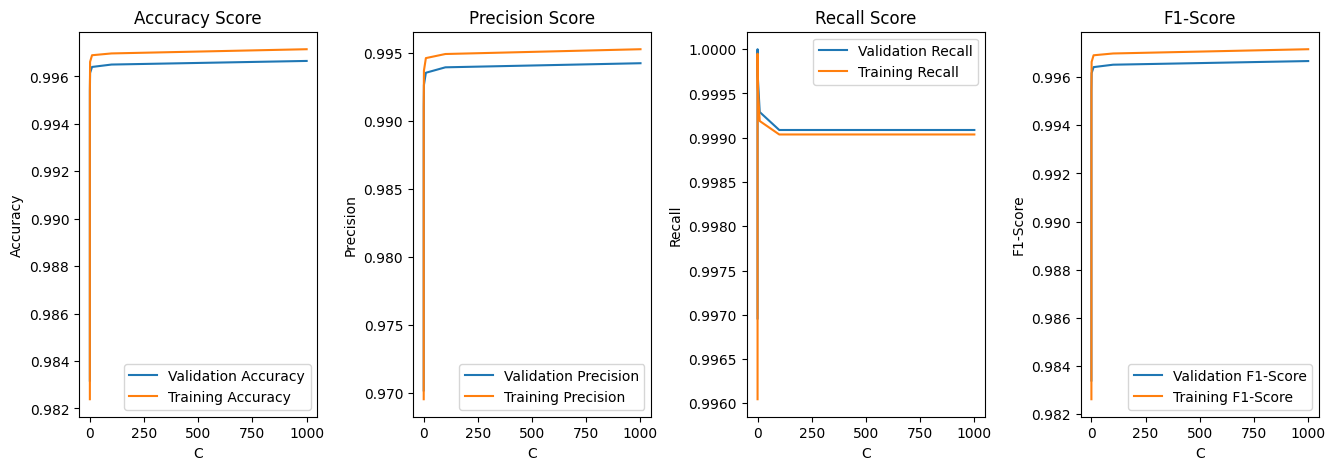

In [48]:
plot_performance(c, 'C')

#### Hyperparameter Tuning with Solver

default = lgfgs

In [49]:
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

train_auc_score = []
val_auc_score = []
train_accuracy = []
val_accuracy = []
train_recall = []
val_recall = []
train_precision = []
val_precision = []
train_f1_score = []
val_f1_score = []

C = 100
max_iter = 2000
    
for i in solver:
    log = LogisticRegression(random_state=8, max_iter=max_iter, C=C, solver=i).fit(X_train, y_train)

    y_train_preds = log.predict(X_train)
    y_val_preds = log.predict(X_val)
    
    y_train_probs = log.predict_proba(X_train)[:, 1]
    y_val_probs = log.predict_proba(X_val)[:, 1]

    train_accuracy.append(accuracy_score(y_train, y_train_preds))
    val_accuracy.append(accuracy_score(y_val, y_val_preds))

    train_recall.append(recall_score(y_train, y_train_preds))
    val_recall.append(recall_score(y_val, y_val_preds))

    train_precision.append(precision_score(y_train, y_train_preds))
    val_precision.append(precision_score(y_val, y_val_preds))

    train_f1_score.append(f1_score(y_train, y_train_preds))
    val_f1_score.append(f1_score(y_val, y_val_preds))
    
    train_auc_score.append(roc_auc_score(y_train, y_train_probs))
    val_auc_score.append(roc_auc_score(y_val, y_val_probs))
    
results_solver = pd.DataFrame({'train_auc_score': train_auc_score,
                          'val_auc_score': val_auc_score,
                          'train_accuracy': train_accuracy,
                          'val_accuracy': val_accuracy,
                          'train_precision': train_precision,
                          'val_precision': val_precision,
                          'train_recall': train_recall,
                          'val_recall': val_recall,
                          'train_f1_score': train_f1_score,
                          'val_f1_score': val_f1_score}, index=solver)
results_solver

,train_auc_score,val_auc_score,train_accuracy,val_accuracy,train_precision,val_precision,train_recall,val_recall,train_f1_score,val_f1_score
lbfgs,0.999924,0.999887,0.996972,0.996503,0.994928,0.993950,0.999037,0.999088,0.996978,0.996512
liblinear,0.999913,0.999850,0.996972,0.996300,0.994728,0.993251,0.999240,0.999392,0.996979,0.996312
newton-cg,0.999924,0.999887,0.996972,0.996503,0.994928,0.993950,0.999037,0.999088,0.996978,0.996512
newton-cholesky,0.999923,0.999881,0.996959,0.996503,0.994953,0.993850,0.998986,0.999189,0.996965,0.996513
sag,0.999512,0.999273,0.994603,0.994831,0.989419,0.989866,0.999899,0.999899,0.994631,0.994857
saga,0.999305,0.998996,0.994096,0.994273,0.988379,0.988676,0.999949,1.000000,0.994130,0.994306


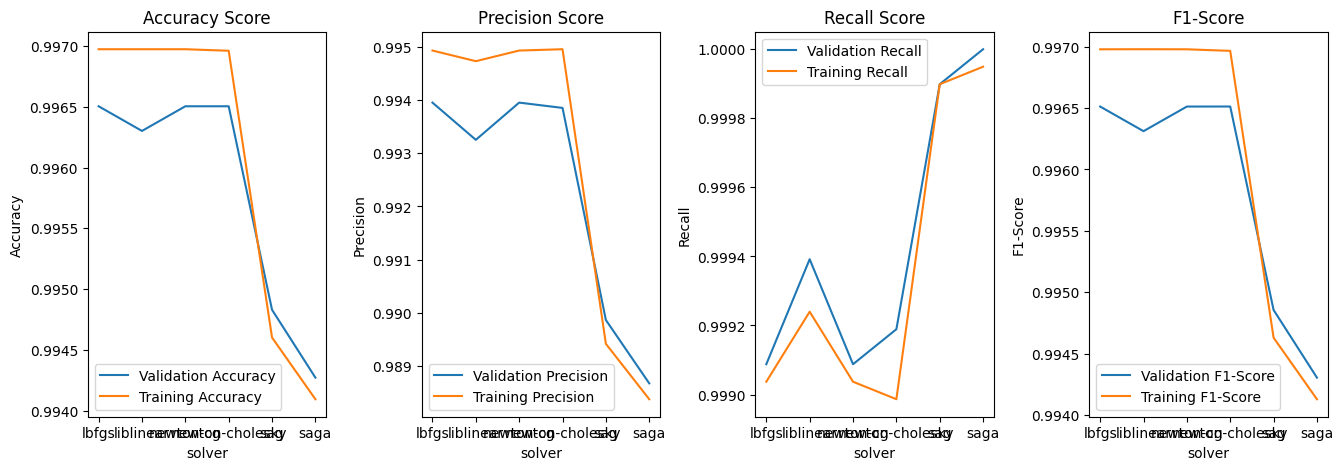

In [51]:
plot_performance(solver, 'solver')

#### Hyperparameter Tuning with Penalty

Penalties support by solver were 'l2', and 'none'

default = l2

In [52]:
penalty = ['l2', 'none']

train_auc_score = []
val_auc_score = []
train_accuracy = []
val_accuracy = []
train_recall = []
val_recall = []
train_precision = []
val_precision = []
train_f1_score = []
val_f1_score = []

C = 100
max_iter = 2000
solver = 'lbfgs'
    
for i in penalty:
    log = LogisticRegression(random_state=8, max_iter=max_iter, C=C, solver=solver, penalty=i).fit(X_train, y_train)
    y_train_preds = log.predict(X_train)
    y_val_preds = log.predict(X_val)
    
    y_train_probs = log.predict_proba(X_train)[:, 1]
    y_val_probs = log.predict_proba(X_val)[:, 1]

    train_accuracy.append(accuracy_score(y_train, y_train_preds))
    val_accuracy.append(accuracy_score(y_val, y_val_preds))

    train_recall.append(recall_score(y_train, y_train_preds))
    val_recall.append(recall_score(y_val, y_val_preds))

    train_precision.append(precision_score(y_train, y_train_preds))
    val_precision.append(precision_score(y_val, y_val_preds))

    train_f1_score.append(f1_score(y_train, y_train_preds))
    val_f1_score.append(f1_score(y_val, y_val_preds))
    
    train_auc_score.append(roc_auc_score(y_train, y_train_probs))
    val_auc_score.append(roc_auc_score(y_val, y_val_probs))

results_penalty = pd.DataFrame({'train_auc_score': train_auc_score,
                          'val_auc_score': val_auc_score,
                          'train_accuracy': train_accuracy,
                          'val_accuracy': val_accuracy,
                          'train_precision': train_precision,
                          'val_precision': val_precision,
                          'train_recall': train_recall,
                          'val_recall': val_recall,
                          'train_f1_score': train_f1_score,
                          'val_f1_score': val_f1_score}, index=penalty)
results_penalty
    

/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solv

,train_auc_score,val_auc_score,train_accuracy,val_accuracy,train_precision,val_precision,train_recall,val_recall,train_f1_score,val_f1_score
l2,0.999924,0.999887,0.996972,0.996503,0.994928,0.993950,0.999037,0.999088,0.996978,0.996512
none,0.999934,0.999905,0.997301,0.996959,0.995531,0.994753,0.999088,0.999189,0.997306,0.996966


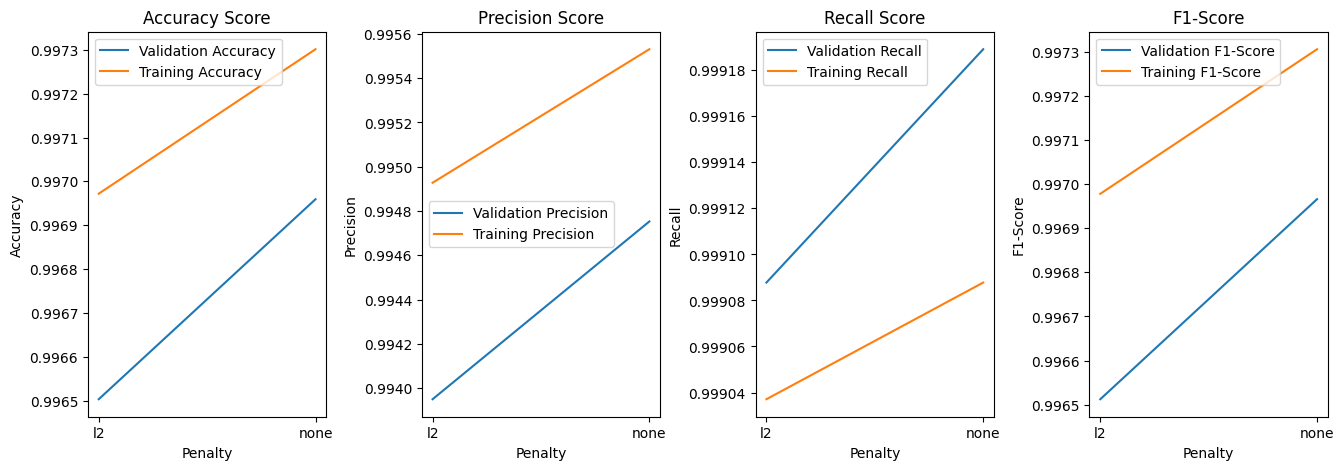

In [53]:
plot_performance(penalty, 'Penalty')

#### Hyperparameter Tuning with Multi-Class Handling

default = auto

In [54]:
multi_class = ['auto', 'ovr', 'multinomial']

train_auc_score = []
val_auc_score = []
train_accuracy = []
val_accuracy = []
train_recall = []
val_recall = []
train_precision = []
val_precision = []
train_f1_score = []
val_f1_score = []

C = 100
max_iter = 2000
solver = 'lbfgs'
penalty = 'none'
    
for i in multi_class:
    log = LogisticRegression(random_state=8, max_iter=max_iter, C=C, solver=solver, penalty=penalty, multi_class=i).fit(X_train, y_train)
    y_train_preds = log.predict(X_train)
    y_val_preds = log.predict(X_val)
    
    y_train_probs = log.predict_proba(X_train)[:, 1]
    y_val_probs = log.predict_proba(X_val)[:, 1]

    train_accuracy.append(accuracy_score(y_train, y_train_preds))
    val_accuracy.append(accuracy_score(y_val, y_val_preds))

    train_recall.append(recall_score(y_train, y_train_preds))
    val_recall.append(recall_score(y_val, y_val_preds))

    train_precision.append(precision_score(y_train, y_train_preds))
    val_precision.append(precision_score(y_val, y_val_preds))

    train_f1_score.append(f1_score(y_train, y_train_preds))
    val_f1_score.append(f1_score(y_val, y_val_preds))
    
    train_auc_score.append(roc_auc_score(y_train, y_train_probs))
    val_auc_score.append(roc_auc_score(y_val, y_val_probs))

results_multiclass = pd.DataFrame({'train_auc_score': train_auc_score,
                          'val_auc_score': val_auc_score,
                          'train_accuracy': train_accuracy,
                          'val_accuracy': val_accuracy,
                          'train_precision': train_precision,
                          'val_precision': val_precision,
                          'train_recall': train_recall,
                          'val_recall': val_recall,
                          'train_f1_score': train_f1_score,
                          'val_f1_score': val_f1_score}, index=multi_class)
results_multiclass

/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solv

,train_auc_score,val_auc_score,train_accuracy,val_accuracy,train_precision,val_precision,train_recall,val_recall,train_f1_score,val_f1_score
auto,0.999934,0.999905,0.997301,0.996959,0.995531,0.994753,0.999088,0.999189,0.997306,0.996966
ovr,0.999934,0.999905,0.997301,0.996959,0.995531,0.994753,0.999088,0.999189,0.997306,0.996966
multinomial,0.999934,0.999905,0.997314,0.996858,0.995556,0.994552,0.999088,0.999189,0.997319,0.996865


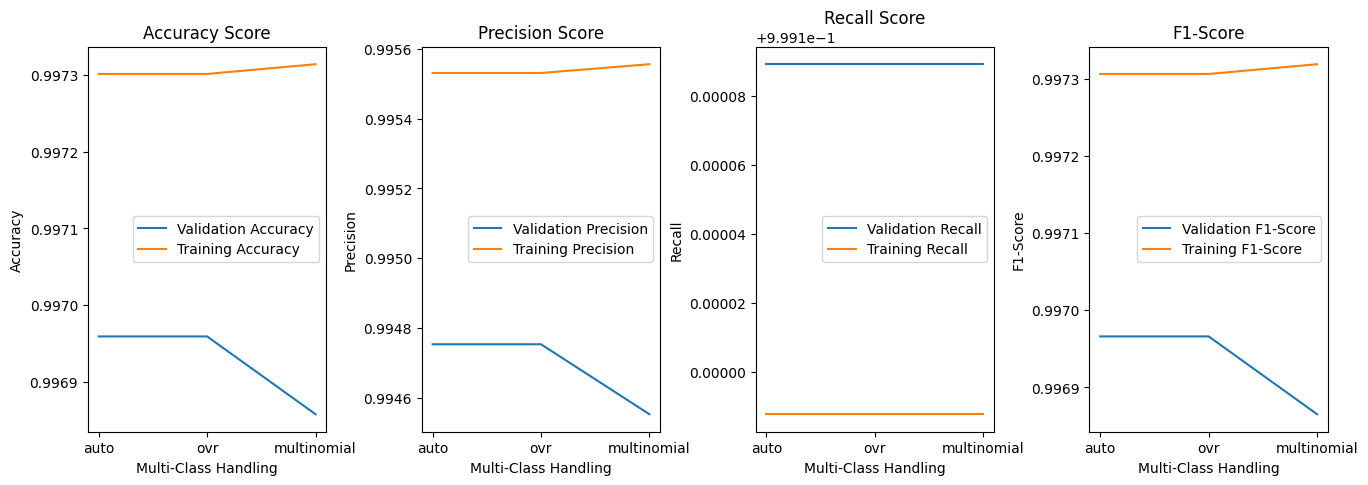

In [55]:
plot_performance(multi_class, 'Multi-Class Handling')

### Model after hyperparameter tuning

In [60]:
log_reg_tune = LogisticRegression(random_state=8, max_iter=max_iter, C=C, solver=solver, penalty=penalty, multi_class='auto')
log_reg_tune.fit(X_train, y_train)

/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solv

LogisticRegression(C=100, max_iter=2000, penalty='none', random_state=8)

In [61]:
modeling_tune = Modeling(log_reg_tune, X_train, X_val, y_train, y_val, X_test)

                roc-auc score  accuracy score  precision score  recall score   
Training Set         0.999934        0.997301         0.995531      0.999088  \
Validation Set       0.999905        0.996959         0.994753      0.999189   

                f1 score  
Training Set    0.997306  
Validation Set  0.996966  


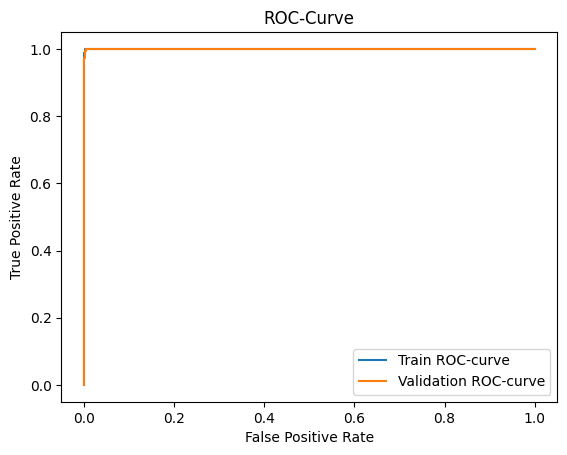

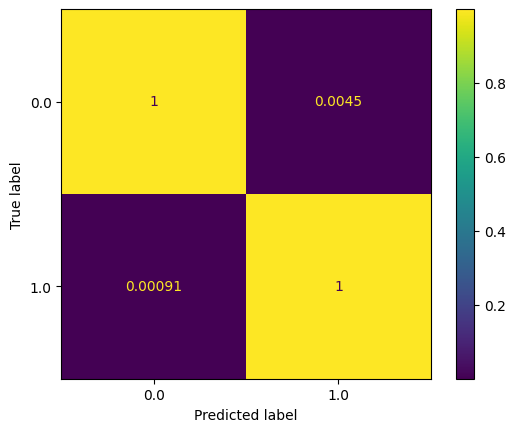

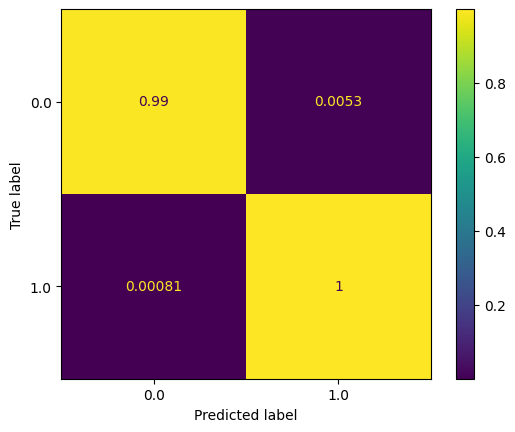

In [62]:
modeling_tune.predict_model()

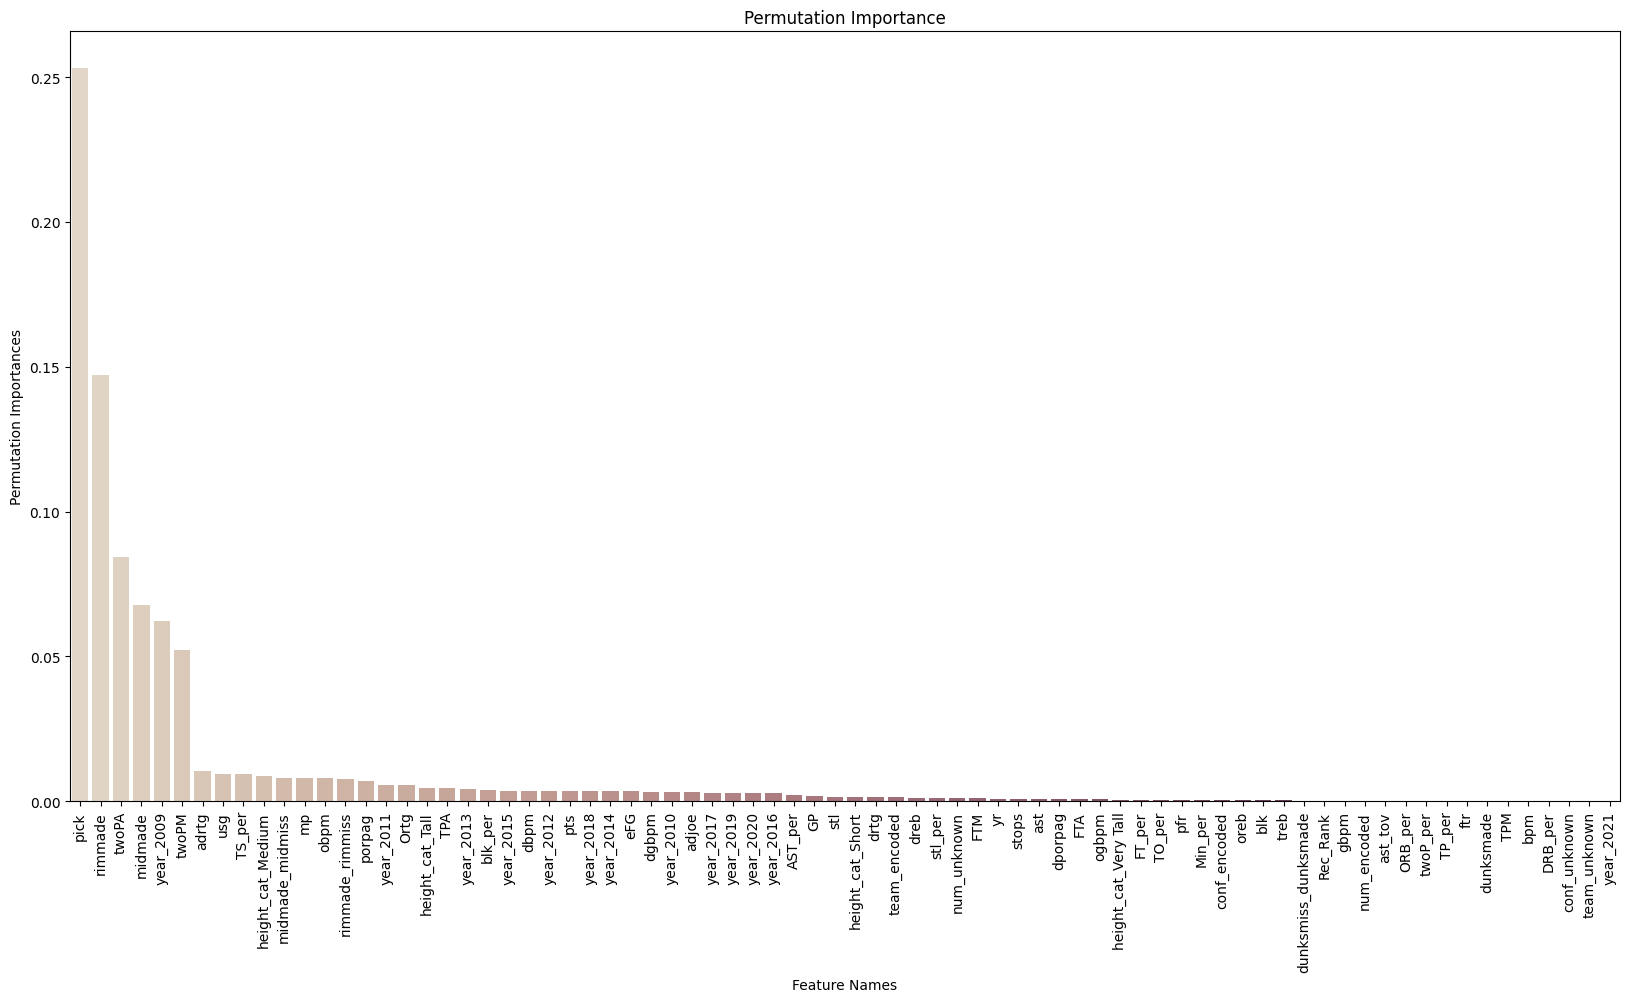

In [63]:
permutation_score_tune = modeling_tune.permutation_importance()

In [187]:
dump(log_reg_tune, '../models/log_reg_tune.joblib')

['../models/log_reg_tune.joblib']

In [64]:
y_test_probs_2 = log_reg_tune.predict_proba(X_test)[:, 1]

In [65]:
submission_2 = submission_file(y_test_probs_2)

In [66]:
submission_2

,player_id,drafted
0,cf302b4d-84f7-4124-a25d-a75eed31978b,0.0
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da,0.0
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916,0.0
3,32402798-471c-4a54-8cb4-29cd95199014,0.0
4,73b960f9-27b8-4431-9d23-a760e9bbc360,0.0
...,...,...
4965,a25ee55f-02a3-4f8e-8194-a5f427e14e7c,0.0
4966,d0d9f45e-7b01-44b3-8d40-514ec338611d,0.0
4967,f8df22c4-1602-4fab-896d-8820951aae2f,0.0
4968,b791c69a-f769-4163-afda-051a6fd20a9d,0.0


In [67]:
submission_2.to_csv('../data/submission/submission_2_log_tune.csv', index=False)